# **_INSTALL DEPENDENCIES_**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numpy import concatenate, ones, array, shape, zeros, mean
from IPython.display import Markdown, display

FILES = "Files"
EX2DATA1 = FILES + "/ex2data1.txt"
EX2DATA2 = FILES + "/ex2data2.txt"

# with open('../README.md', 'r', encoding='utf-8') as f:
#     display(Markdown(f.read()))

# Step 1: Helper Functions

## Step 1.1: Sigmoid Function

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Step 1.2: Cost Function

In [19]:
def costFunction(theta, X, y):
    m = y.size
    y_pred = sigmoid(X.dot(theta))
    J = np.sum(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)) / m
    grad = (X.T.dot(y_pred - y)) / m
    return J, grad

## Step 1.3: Regularized Cost Function

In [18]:
def costFunctionReg(theta, X, y, _lambda):
    m = y.size
    y_pred = sigmoid(X.dot(theta))
    J = np.sum(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)) / m
    J += _lambda * np.sum(theta[1:]**2) / (2*m)
    grad = (X.T.dot(y_pred - y)) / m
    grad[1:] += (_lambda / m) * theta[1:]
    return J, grad

## Step 1.4: Predict Function

In [17]:
def predict(theta, X):
    y_pred = sigmoid(X.dot(theta))
    return np.round(y_pred)

## Step 1.5: Plot data

In [41]:
def plotData(X, y):
    plt.plot(X[y==1, 0], X[y==1, 1], 'r*', label='y=1')
    plt.plot(X[y==0, 0], X[y==0, 1], 'bo', label='y=0')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

## Step 1.6: Map Features for Polynomial Regression

In [15]:
def mapFeature(X1, X2, degree=6):
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, (X1**(i-j) * X2**j).reshape(-1,1)))
    return out

## Step 1.7: Plot Decision Boundary

In [39]:
def plotDecisionBoundary(theta, X, y):
    plotData(X[:,1:3], y)
    
    if X.shape[1] <= 3:
        # Linear decision boundary
        plot_x = np.array([min(X[:,1])-2, max(X[:,1])+2])
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
        plt.plot(plot_x, plot_y)
    else:
        # Non-linear boundary (polynomial features)
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = mapFeature(np.array([u[i]]), np.array([v[j]])) @ theta
        z = z.T
        plt.contour(u, v, z, levels=[0], colors='c', linewidths=2)

# Step 2: Load Data

In [25]:
data1 = np.loadtxt(EX2DATA1, delimiter=",")
X1 = data1[:, 0:2]
y1 = data1[:, 2]

# Plotting
print("Number of examples for each class:")
print("y=0:", sum(y1==0))
print("y=1:", sum(y1==1))

Number of examples for each class:
y=0: 40
y=1: 60


## Step 2.1: Visualize Data

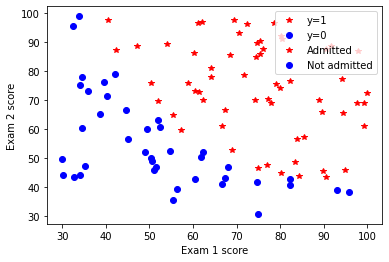

In [42]:
plotData(X1, y1)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.plot([], [], "r*", label="Admitted")
plt.plot([], [], "bo", label="Not admitted")
plt.legend()
plt.show()

# Step 3: Sigmoid (for reference)

In [28]:
z = np.array([0, 2, -2])
sigmoid(z)

array([0.5       , 0.88079708, 0.11920292])

# Step 4: Compute Cost and Gradient

In [29]:
# Add intercept term
m, n = shape(X1)
X1_aug = concatenate((ones((m,1)), X1), axis=1)

# Initialize parameters
theta_init = zeros(n+1)

# Compute cost and gradient at theta_init
J, grad = costFunction(theta_init, X1_aug, y1)
print("Cost at initial theta:", J)
print("Gradient at initial theta:", grad)

# Test with non-zero theta
theta_test = array([-24, 0.2, 0.2])
J_test, grad_test = costFunction(theta_test, X1_aug, y1)
print("Cost at test theta:", J_test)
print("Gradient at test theta:", grad_test)

Cost at initial theta: 0.6931471805599453
Gradient at initial theta: [ -0.1        -12.00921659 -11.26284221]
Cost at test theta: 0.21833019382659777
Gradient at test theta: [0.04290299 2.56623412 2.64679737]


# Step 5: Optimize Parameters

In [30]:
options = {"maxiter": 400}
result = minimize(fun=costFunction, x0=theta_init, args=(X1_aug, y1),
                  jac=True, method="TNC", options=options)
theta_opt = result.x
cost_opt = result.fun

print("Optimized theta:", theta_opt)
print("Optimized cost:", cost_opt)

Optimized theta: [-25.16131859   0.20623159   0.20147149]
Optimized cost: 0.20349770158947467


## Step 5.1: Plot Decision Boundary

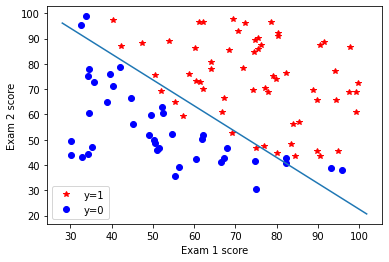

In [44]:
plotDecisionBoundary(theta_opt, X1_aug, y1)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()

# Step 6: Make Predictions

In [32]:
# Example: student with scores 45 and 85
prob = sigmoid(array([1, 45, 85]) @ theta_opt)
print(f"Admission probability for (45,85): {prob:.3f}")

# Training set accuracy
p_train = predict(theta_opt, X1_aug)
accuracy = mean(p_train == y1) * 100
print(f"Training accuracy: {accuracy:.1f}%")

Admission probability for (45,85): 0.776
Training accuracy: 89.0%


# Step 7: Regularized Logistic Regression

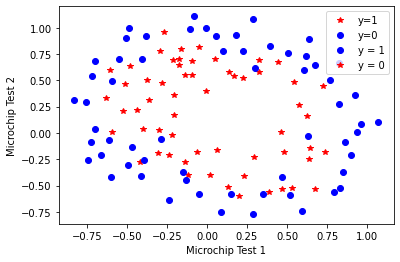

Initial cost (reg): 0.6931471805599454
Initial gradient (first 5 values): [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


In [45]:
data2 = np.loadtxt(EX2DATA2, delimiter=",")
X2 = data2[:, 0:2]
y2 = data2[:, 2]

plotData(X2, y2)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.plot([], [], "bo", label="y = 1")
plt.plot([], [], "r*", label="y = 0")
plt.legend()
plt.show()

# Add polynomial features
X2_poly = mapFeature(X2[:, 0], X2[:, 1])

# Initialize parameters and lambda
theta_init2 = zeros(X2_poly.shape[1])
_lambda = 1

# Compute initial cost and gradient
J_reg, grad_reg = costFunctionReg(theta_init2, X2_poly, y2, _lambda)
print("Initial cost (reg):", J_reg)
print("Initial gradient (first 5 values):", grad_reg[:5])

# Step 8: Optimize Regularized Logistic Regression

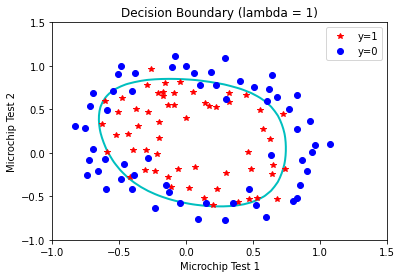

Training accuracy (reg): 83.05%


In [46]:
options = {"maxiter": 1800}
result_reg = minimize(fun=costFunctionReg, x0=theta_init2, args=(X2_poly, y2, _lambda),
                      jac=True, method="TNC", options=options)
theta_reg = result_reg.x

# Plot decision boundary
plotDecisionBoundary(theta_reg, X2_poly, y2)
plt.title(f"Decision Boundary (lambda = {_lambda})")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.show()

# Training set accuracy
p_train2 = predict(theta_reg, X2_poly)
accuracy2 = mean(p_train2 == y2) * 100
print(f"Training accuracy (reg): {accuracy2:.2f}%")